<a href="https://colab.research.google.com/github/syma-afsha/Machine_Learning/blob/main/Syma_Afsha_03_Logistic_Regression_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Logistic Regression

Logistic regression, despite its name, is a classification model rather than regression model. Logistic regression is a simple and more efficient method for binary and linear classification problems. It is a classification model, which is very easy to realize and achieves very good performance with linearly separable classes.



---



## Goals
In this lab, you will:
- implement your first classifier
- understand the concept of region boundary

In this Notebook we are going to see how this algorithm works with a simple example, using the Python library "scikit-learn", especifically the ["LogisticRegression" function](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

First, we are going to import some libraries and functions that we will use:


*   `Numpy`, that allows us to work with arrays
*   The `LogisticRegression` function from the linear_model package in the Scikit-learn library
*   The `pylot` package from Matplotlib, that will allow us to plot some results
*   `Seaborn` and the `metrics` function from the Scikit-learn library, that allows us to plot the confusion matrix
*   The `expit` function from the special package in the Scipy library



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from scipy.special import expit

Then we define some functions that will be useful to plot the results of the models we will create

In [ ]:
# Create a meshgrid with values ranging. from 0 to the maximum values of x and y
def make_meshgrid(x, y, h=.02):
    x_min, x_max = 0, x.max() + 1
    y_min, y_max = 0, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Plot the contours of a function clf within the values of xx and yy in the figure ax
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Plot a figure with the points (X,Y) and the classification function
def plot_figure(X, Y, clf, dataset):
  fig, ax = plt.subplots(figsize=(10, 7))
  # title for the plots
  title = ('Decision surface of SVC '+dataset)
  # Set-up grid for plotting.
  X0, X1 = X[:, 0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=50, edgecolors='face')
  ax.set_ylabel('x2')
  ax.set_xlabel('x1')
  ax.set_xticks(np.arange(0, X0.max() + 1, 10))
  ax.set_yticks(np.arange(0, X1.max() + 1, 10))
  ax.set_title(title)
  plt.show()

## **DATA DEFINITION**

We are presented with a simple 1 dimensional problem with 2 classes of observations. We have given an automated program the course grades to decide if the students passed or failed, but this program has a glitch and sometimes the result is not very accurate. We have two resulting datasets:

*   Training data, where **XTrain** contains the features of the training samples, in this case the grades, and **yTrain** contains the ground truth of these samples, in this case if they passed or failed. This dataset will be used to train the model.
*   Testing data, where **XTest** contains the features of the training samples, in this case the grades, and **yTest** contains the ground truth of these samples, in this case if they passed or failed. This dataset will be used to verify how accurate the trained model is.

In [ ]:
# Parameters of training data
XTrain = np.array([[0],[0.6],[1],[1.25],[1.7],[2.1],[2.9],[3.5],[3.8],[4],[4.5],[4.6],[4.8],[4.9],[4.9],[5],[5.3],[6.1],[6.4],[6.9],[7.3],[7.5],[8],[8.6],[9],[9.4],[10]])
# Ground truth of training data
yTrain = np.array([ 0,   0,   0,   0,     0,    0,    0,    0,    0,   0,   0,    1,    0,    1,    0,    1,   1,   1,    1,    1,    1,    1,    1,   1,   1,   1,  1])

# Parameters of testing data
XTest = np.array([[0],[0.3],[1.1],[1.45],[1.77],[2.2],[2.75],[3.3],[3.9],[4.1],[4.55],[4.66],[4.78],[4.9],[4.99],[5.05],[5.35],[6.4],[6.6],[7],[7.2],[7.8],[8.2],[8.5],[9.3],[9.8],[10]])
# Ground truth of testing data
yTest = np.array([ 0,   0,    0,     0,    0,     0,    0,     0,    0,    0,     0,    0,     0,     0,    0,     1,     1,     1,    1,   1,   1,    1,    1,    1,    1,    1,   1])

To start, we have an example of how to create a basic regression function using the [**"LogisticRegression"**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) function. Next, the mean error percentage is computed for the train data and the fitted function and the training data is plotted.

In [ ]:
# Fit the classifier
clf = LogisticRegression()
clf.fit(XTrain, yTrain)

# Check predictions for training data
res = clf.predict(XTrain)
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with training data")
print((100/len(res)*np.count_nonzero(yTrain == res)))

% of correct predictions with training data
88.88888888888889


Now we have the model created and we know the % of correct predictions of the training data. **Which is the % of correct predictions for the testing data? Round the value to 2 decimals.**

In [ ]:
# Check predictions for testing data
res = clf.predict(XTest) #__________TO DO__________
# Calculate % of correct predictions using (number of correct predictions / number of predictions * 100)
print("% of correct predictions with testing data")
Correct_predictions=(100/len(res)*np.count_nonzero(yTest==res))#__________TO DO__________)
print(round(Correct_predictions,2))

% of correct predictions with testing data
92.59


<font color="red">After fitting training dataset using Logistic Regression classifier, predicted the testing data. Then predicted how many correct predictions are occurred from the testing data.
% of correct predictions for the testing data is 92.59 </font>

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.

The hypothesis of logistic regression tends it to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression.

Now that we have trained the model, we are going to plot this Sigmoid function (red line) and the training (green circles) and testing (blue triangles) data for this model and analyze the results.

In [ ]:
clf

LogisticRegression()

In [ ]:
clf.coef_

array([[1.50938951]])

In [ ]:
clf.intercept_

array([-7.23286439])

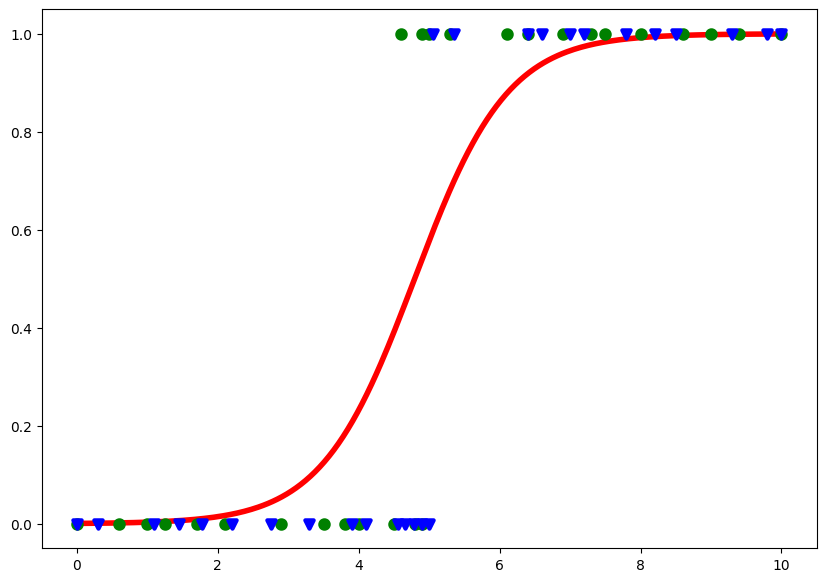

In [ ]:
# and plot the resulting sigmoid
plt.figure(1, figsize=(10, 7))
plt.clf()
plt.scatter(XTrain.ravel(), yTrain, color="green", zorder=20, linewidths = 3)
plt.scatter(XTest.ravel(), yTest, color="blue", zorder=20, marker = 'v', linewidths = 3)
X_test = np.linspace(0, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color="red", linewidth=4)



---



Now that we've seen an example of how this works, we are going to see a slightly more complex problem.

## **DATA DEFINITION**

In this case, we are presented with a simple 2 dimensional problem with 2 classes of observations. We have two datasets:


*   Training data, where **XTrain** contains the features of the training samples and **yTrain** contains the ground truth of these samples. This dataset will be used to train the SVM models.
*   Testing data, where **XTest** contains the features of the testing samples and **yTest** contains the ground truth of these samples. This dataset will be used to verify how accurate the trained SVM models are.



In [ ]:
# Parameters of training data
XTrain2 = np.array([[ 4, 43], [ 5, 12], [10, 31], [10, 20], [20, 37], [16, 10], [22, 18], [24,  4], [28,  9], [33, 19], [38,  5], [15, 47], [30, 32], [52,  6], [ 6, 60], \
                   [50,  8], [23, 58], [26, 50], [30, 40], [35, 28], [42, 61], [36, 50], [43, 37], [46, 45], [50, 22], [55, 35], [65, 25], [70, 46], [27, 37], [24, 23], [38, 19]])
# Ground truth of training data
yTrain2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Parameters of testing data
XTest2 = np.array([[3, 56], [4, 18], [6, 5], [10, 32], [16, 19], [18, 3], [33, 6], [28, 15], [28, 25], [24, 30], [25, 57], [50, 3], \
                  [20, 53], [28, 55], [35, 45], [38, 27], [37, 13], [40, 3], [57, 5], [53, 29], [50, 46], [64, 34], [65, 57], [31, 30]])
# Ground truth of testing data
yTest2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# **Modeling Logistic Regressions**

Define a new model now with the 2D data and compute the % of correct predictions of the training and testing data. **Visualize the plot and analize the results.**

90.32258064516128
83.33333333333334


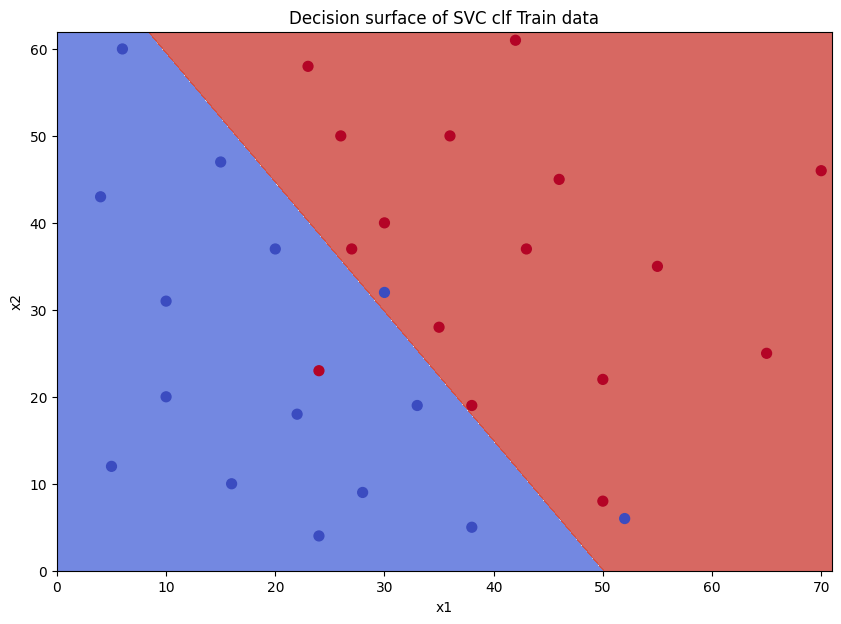

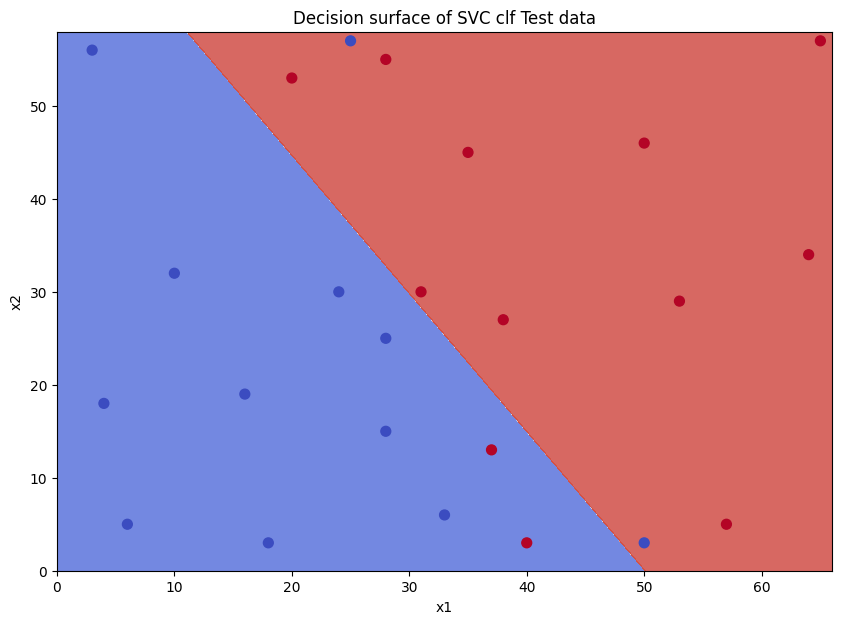

In [ ]:
# TO DO: Define a new model now with the 2D data and compute the % of correct predictions of the training and testing data
# Create the logistic regression model
clf = LogisticRegression()#__________TO DO__________
clf.fit(XTrain2,yTrain2)
# Check predictions for training data
#__________TO DO__________

res1=clf.predict(XTrain2)
print((100/len(res1)*np.count_nonzero(yTrain2==res1)))
# Check predictions for testing data
#__________TO DO__________
res2=clf.predict(XTest2)
print((100/len(res2)*np.count_nonzero(yTest2==res2)))

#Plot the resulting polynomial model of degree 3 with the training and testing datasets
plot_figure(XTrain2, yTrain2, clf, 'clf Train data')
plot_figure(XTest2, yTest2, clf, 'clf Test data')

<font color="red"/> Using Logistic Regression classifier, predicted how many correct predictions from training and testing datasets.
<font color="red"/> % of correct predictions for the training data is 90.32.

<font color="red"/> % of correct predictions for the testing data is 83.33.

<font color="red"> 3 degree polynomial hypothesis function,
ℎ𝜃(𝑥) = 𝑔(𝜃0+ 𝜃1*𝑥1+𝜃2*x2).
The both graphs have showed here the decision boundaries created by the logistic regression model splitting the features of data, x1 and x2 (training and testing) into two classes by using decision surfaces which are the property of hypothesis function and hyperparameters, not the property of data points. Data points on one side of the decision boundary are predicted as class 0, while those on the other side are predicted as class 1.  
 </font>

Here we have the plot of the confusion matrix of the training data results. Plot the *confusion matrix for the testing data using the 'rocket_r' color palette*, and, with the previous plots, further analyze the results gotten.

Text(0.5, 1.0, 'Confusion matrix testing data')

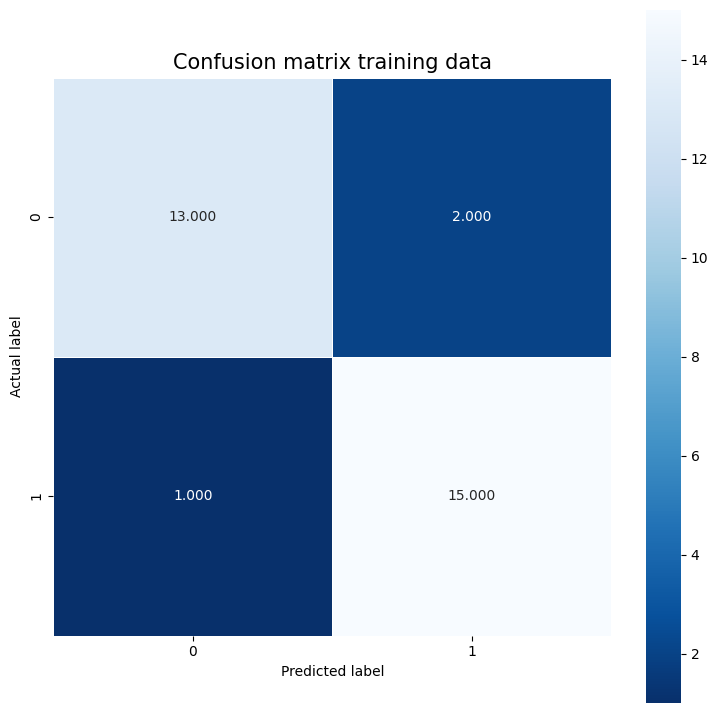

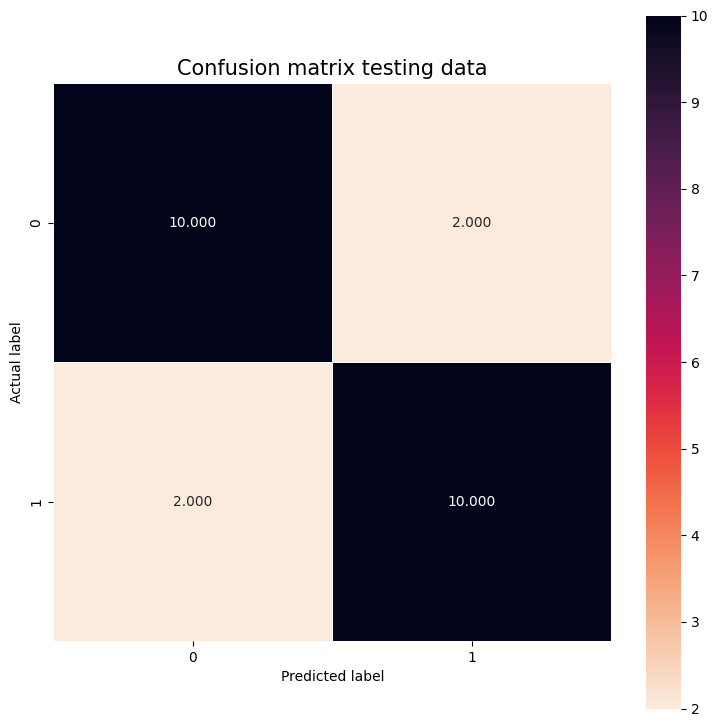

In [ ]:
#Plot the confusion matrix of the training data
res1 = clf.predict(XTrain2)
cm1 = metrics.confusion_matrix(yTrain2, res1)
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label')
plt.title("Confusion matrix training data", size = 15)

# TO DO: Plot the confusion matrix of the testing data
#__________TO DO__________
res2=clf.predict(XTest2)
cm2=metrics.confusion_matrix(yTest2,res2)
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'rocket_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label')
plt.title("Confusion matrix testing data", size = 15)



<font color="red"/>The confusion matrixes show a visual representation of how well the logistic regression model is performing.

<font color="red"/>The top left corner contains the number of true negative (TN), which is correctly predicted data points as negative class. (0 class).

<font color="red"/>The top right corner contains the number of false positive (FP), which is incorrectly predicted data points as positive class (1 class).

<font color="red"/>The bottom left corner contains the number of false negative (FN), which is incorrectly predicted data points as negative class (0 class).

<font color="red">The bottom right corner contains the number of true positive (TP), which is correctly predicted data points as positive class (1 class).
</font>

<font color="red"/> From both graphs, it has showed that TP and TN contain high numbers than FP and FN that means the model is corectly predicted the data points well.





<font color="red"></font>